In [1]:
import api
import cv2 
from matplotlib import pyplot as plt 
import timeit
plt.ion()
%matplotlib inline



/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


INFO:tensorflow:Scale of 0 disables regularizer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
INFO:tensorflow:Restoring parameters from model/checkpoint-25000


# Find human location by using MobilenetSSD

In [2]:
img1 = cv2.imread('test/test1.png')[:,:,::-1]
img2 = cv2.imread('test/test2.png')[:,:,::-1]
img3 = cv2.imread('test/test3.png')[:,:,::-1]

img1_location = api.human_locations(img1)
img2_location = api.human_locations(img2)
img3_location = api.human_locations(img3)

img_1_human = api.crop_human(img1, img1_location)
img_2_human = api.crop_human(img2, img2_location)
img_3_human = api.crop_human(img3, img3_location)

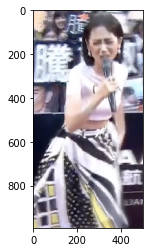

In [3]:
# human 1 photo 1
human_1_1 = img_1_human[0]
plt.imshow(human_1_1)

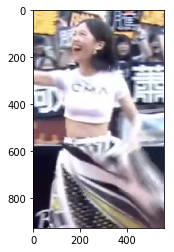

In [4]:
# human 1 photo 2
human_1_2 = img_2_human[0]
plt.imshow(human_1_2)

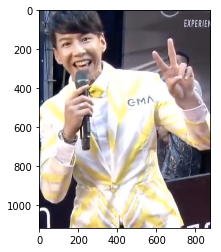

In [5]:
# human 2 photo 1
human_2_1 = img_3_human[0]
plt.imshow(human_2_1)

# Make vector of human image

In [6]:
t1 = timeit.default_timer()
human_1_1_vector = api.human_vector(human_1_1)
human_1_2_vector = api.human_vector(human_1_2)
human_2_1_vector = api.human_vector(human_2_1)
t2 = timeit.default_timer()
print('Time elapsed: {} sec'.format(round(t2 - t1, 3)))

Time elapsed: 0.539 sec


# Comparing vector

In [7]:
api.human_distance(human_1_1_vector, human_1_2_vector)

7.482921

In [8]:
api.human_distance(human_1_2_vector, human_2_1_vector)

20.996862

In [9]:
api.human_distance(human_1_1_vector, human_2_1_vector)

18.61594